In [0]:
#################################################################################################
############------- EntendimientoeInterpretabilidadAlgoritmos ------------#######################
#################################################################################################
# Capacitador: André Omar Chávez Panduro
# email: andrecp38@gmail.com / andre.chavez@urp.edu.pe
# version: 1.0
################################################################################################

In [46]:
# Nos vinculamos a nuestro drive, para poder usar facilmente GColab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.- Importación de Librerías y Carga de Información

In [0]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
from scipy import stats 

In [0]:
# Leemos la data
desarrll = pd.read_csv("/content/drive/My Drive/Colab Notebooks/InterpretabilidadEntendimientoAlgoritmos/train.csv") 

In [51]:
desarrll.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [139]:
# Dimension
desarrll.shape

(614, 13)

1.- Preprocesamiento y Tratamiento de Información

In [0]:
# No olvidemos separar las variables cualitativas para poder trabajarlas eficientemente
columnas_categoricas = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents","Loan_Status"]
columnas_numericas = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [0]:
# Imputamos los valores cualitativos
desarrll.Gender = desarrll.Gender.fillna("Male")
desarrll.Married = desarrll.Married.fillna("Yes")
desarrll.Self_Employed = desarrll.Self_Employed.fillna("Yes")
desarrll.Credit_History = desarrll.Credit_History.fillna("1")
desarrll.Dependents = desarrll.Dependents.fillna("0")

In [142]:
# Preprocesamiento con LabelEncoder
from sklearn.preprocessing import LabelEncoder
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(desarrll[str(c)])
    desarrll[str(c)]=le.transform(desarrll[str(c)]) 

Gender
Married
Education
Self_Employed
Property_Area
Dependents
Loan_Status


In [0]:
# Imputamos los valores cuantitativos
for c in columnas_numericas:
    median = desarrll[c].median()
    desarrll[c].fillna(median, inplace=True)

2.- Particion Muestral de los Datos

In [0]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
desarrll = desarrll.drop('Loan_ID', axis=1) # Axis=1

In [0]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(desarrll.drop('Loan_Status', axis=1), 
                                                    desarrll['Loan_Status'], 
                                                    test_size=0.30,
                                                    stratify=desarrll['Loan_Status'],
                                                    random_state=100)

3.- Modelamiento de Datos

In [65]:
# Instalacion
! pip install xgboost

In [0]:
## Modelos Supervisados : XGBoost ##
X_train.Credit_History = X_train.Credit_History.astype(int)
X_test.Credit_History  = X_test.Credit_History.astype(int)
X_train.ApplicantIncome = X_train.ApplicantIncome.astype(float)
X_test.ApplicantIncome  = X_test.ApplicantIncome.astype(float)

In [0]:
# Paso1: Definir la matriz XGB
import xgboost as xgb
# PasoN01: Configuramos los datasets
dtrain =  xgb.DMatrix(data=X_train, label = y_train)
dtest   = xgb.DMatrix(data=X_test,   label = y_test)

In [148]:
# PasoN02: Configurar parametros
xgb_params = {
    "objective": "reg:logistic",
    "eta": 0.005,
    "max_depth": 2,
    "early_stopping_rounds":  50,
    "gamma": 0.1,
    "eval_metric": "auc",
    "print_every_n": 50
}

num_rounds = 250


# PasoN03: 
watch_list  = [(dtrain,'train'),(dtest,'test')] # Hacen un lostado de los datos
xgb_fit = xgb.train(xgb_params, dtrain, num_rounds, watch_list) # Entrenamiento del algoritmo

[0]	train-auc:0.723514	test-auc:0.69814
[1]	train-auc:0.723514	test-auc:0.69814
[2]	train-auc:0.723514	test-auc:0.69814
[3]	train-auc:0.723514	test-auc:0.69814
[4]	train-auc:0.723514	test-auc:0.69814
[5]	train-auc:0.723514	test-auc:0.69814
[6]	train-auc:0.723514	test-auc:0.69814
[7]	train-auc:0.723514	test-auc:0.69814
[8]	train-auc:0.723514	test-auc:0.69814
[9]	train-auc:0.723514	test-auc:0.69814
[10]	train-auc:0.723514	test-auc:0.69814
[11]	train-auc:0.723514	test-auc:0.69814
[12]	train-auc:0.723514	test-auc:0.69814
[13]	train-auc:0.723514	test-auc:0.69814
[14]	train-auc:0.723514	test-auc:0.69814
[15]	train-auc:0.723514	test-auc:0.69814
[16]	train-auc:0.723514	test-auc:0.69814
[17]	train-auc:0.723514	test-auc:0.69814
[18]	train-auc:0.723514	test-auc:0.69814
[19]	train-auc:0.728991	test-auc:0.702077
[20]	train-auc:0.728991	test-auc:0.702077
[21]	train-auc:0.728991	test-auc:0.702077
[22]	train-auc:0.728991	test-auc:0.702077
[23]	train-auc:0.770238	test-auc:0.741719
[24]	train-auc:0.7702

In [149]:
# Importancia de Variables
frame = { 'Gain':        pd.Series(xgb_fit.get_score(importance_type='gain')), # Ganancia en prediccion por la variable
          'Cover':       pd.Series(xgb_fit.get_score(importance_type='cover')),# Profundidad del arbol 
          'Weight':      pd.Series(xgb_fit.get_score(importance_type='weight'))} # En cuanto arboles sale la variable

result = pd.DataFrame(frame) 
result 

,Gain,Cover,Weight
Credit_History,42.983549,98.012929,250
ApplicantIncome,2.397035,79.397734,75
CoapplicantIncome,2.335880,84.430493,57
Property_Area,2.247046,82.841919,116
LoanAmount,0.461559,17.334540,157
Loan_Amount_Term,0.375892,13.760299,54


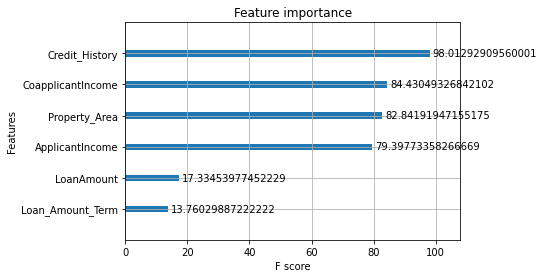

In [150]:
# Importancia de Variables
xgb.plot_importance(xgb_fit,importance_type='cover')

In [0]:
# Interpretabilidad de Algoritmos de Machine Learning

In [72]:
! pip install ELI5

In [0]:
import eli5 

In [152]:
# Vista global de importancia de variables
eli5.show_weights(xgb_fit) 

Weight,Feature
0.8461,Credit_History
0.0472,ApplicantIncome
0.0460,CoapplicantIncome
0.0442,Property_Area
0.0091,LoanAmount
0.0074,Loan_Amount_Term
0,Self_Employed
0,Education
0,Dependents
0,Married


In [0]:
# Vista local de importancia de variables

In [153]:
eli5.explain_prediction(xgb_fit, X_train.iloc[1], feature_names = list(X_train.columns)) 

Explanation(estimator='<xgboost.core.Booster object at 0x7f7dd4e9d828>', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble. Each leaf has an output score, and expected scores can also be\nassigned to parent nodes. Contribution of one feature on the decision path\nis how much expected score changes from parent to child. Weights of all \nfeatures sum to the output score of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision paths', is_regression=True, targets=[TargetExplanation(target='y', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5811118787659291, std=None, value=1.0), FeatureWeight(feature='Credit_History', weight=0.3078441947487364, std=None, value=1.0), FeatureWeight(feature='ApplicantIncome', weight=0.009585467230275459, std=None, value=1853.0), FeatureWeight(feature='CoapplicantIncome', weight=0.004688008835629075, std=None, value=2840.0), FeatureWeight(feature='LoanAmount', weight=0.004020447880360711, std=None, value=114.0)], neg=[FeatureWeight(feature='Property_Area', weight=-0.14432100573493112, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=None, score=0.7629289917259995, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [0]:
# Documentacion Oficial : https://eli5.readthedocs.io/en/latest/index.html#

In [34]:
! pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394123 sha256=1183a1f1b2b3e93ac4f158afb8690a1cbce530433db2477118677e76cf2480c5
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [154]:
import shap
# Need to load JS visualisation in the notebook
shap.initjs()


In [155]:
shap.initjs()
# Usamos el algoritmo que tengamos entrenado y creamos los valores SHAP
explainer = shap.TreeExplainer(xgb_fit)
shap_values = explainer.shap_values(X_train)

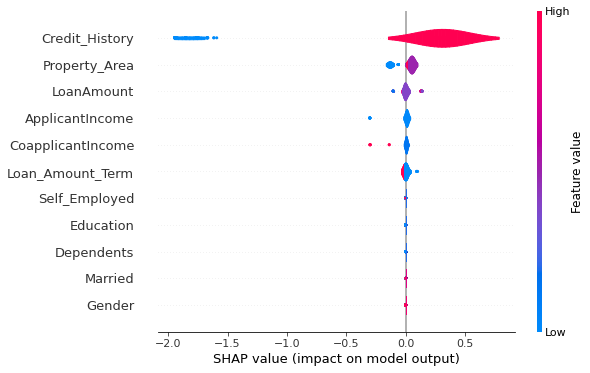

In [157]:
# Vista global de importancia de variables
shap.summary_plot(shap_values, X_train, plot_type="violin")

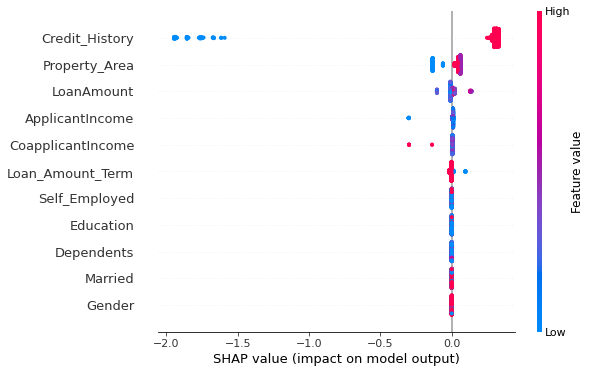

In [84]:
# Podemos resumir los efectos de las caracteristicas sobre el deafault.
shap.initjs()
shap. summary_plot (shap_values , X_train)

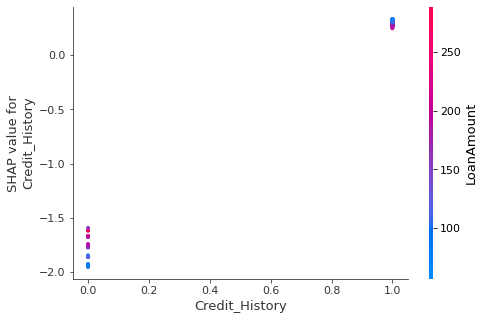

In [106]:
# Podemos ver que variable correlacionada con otra influye en las predicciones
shap.dependence_plot("Credit_History",shap_values, X_train)

In [160]:
# Visualice la explicación de la primera predicción (use matplotlib = True para evitar Javascript) 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[40], features=X_train.loc[40], 
feature_names=X_train.columns)

In [161]:
shap.initjs()
# Visualizar sobre todas las predicciones , la importancia de las variables.
shap.force_plot(explainer.expected_value, shap_values, X_train)

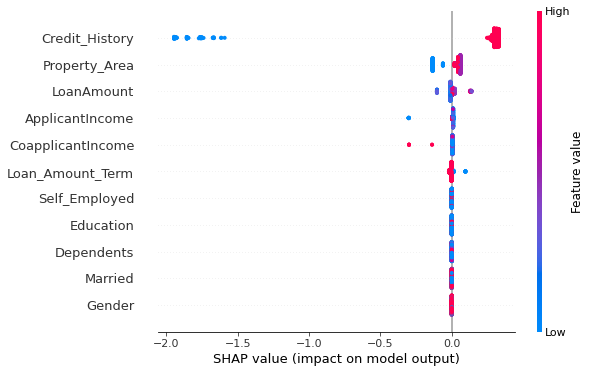

In [41]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

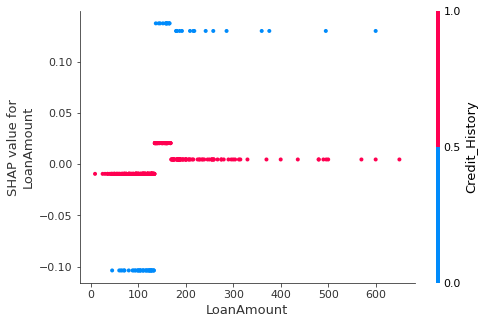

In [92]:
# crear un diagrama de dependencia para mostrar el efecto de una sola característica en todo el conjunto de datos 
shap.dependence_plot ( "LoanAmount" , shap_values, X_train)

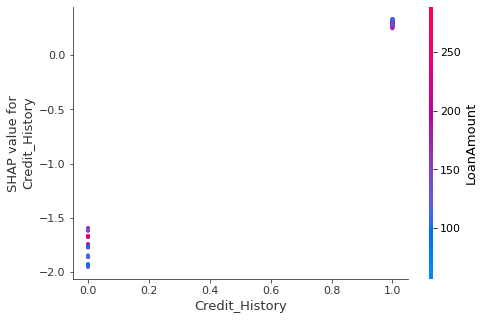

In [0]:
# Fin !!